<a href="https://colab.research.google.com/github/RajwaaWarda/Kelompok-D/blob/main/Case_Study_02_Data_Mining_Group_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>MixITup Ice Cream</center></h1>

MixITup adalah perusahan yang bergerak di bidang usaha Ice Cream, Boba Drinks, dan Desserts (snacks). Saat ini MixITup memiliki 3 cabang di Jakarta, Depok, dan Tangerang. Rencananya MixITup ingin memperluas bisnisnya ke kota lain dan melakukan massive marketing.

Melalui data pelanggan yang berhasil dikumpulkan, akan dilakukan proses Data Mining lalu mendapatkan informasi/insight dan saran/rekomendasi/strategi ke perusahaan.

Salah satu teknik yang bisa dilakukan adalah dengan melakukan **segmentasi pelanggan**. Yaitu dengan mengelompokkan pelanggan-pelanggan yang ada berdasarkan kesamaan karakter dari pelanggan tersebut. Untuk melakukan hal tersebut akan digunakan teknik *unsupervised machine learning*.

*Salah satu teknik yang dapat digunakan adalah pengaplikasian machine learning menggunakan algoritma K-Prototypes. Algoritma K-Prototypes merupakan gabungan dari K-Means dan juga K-Modes yang dapat digunakan untuk melakukan segmentasi dengan data.*

# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
import warnings; warnings.simplefilter('ignore')

In [3]:
!pip install kmodes

In [4]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

In [5]:
import pickle

Masalah ini akan dapat diselesakan dengan bantuan beberapa library sebagai berikut:


*   **Pandas**, digunakan untuk melakukan pemroresan analisis data
*   **Matplotlib**, digunakan sebagai dasar untuk melakukan visualisasi data

*   **Seaborn**, digunakan di atas matplotlib untuk melakukan visualisasi data yang lebih menarik
*   **Scikit - Learn**, digunakan untuk mempersiapkan data sebelum dilakukan permodelan





# Load Data

Langkah pertama yang perlu dilakukan adalah membaca data tersebut yang semula adalah *textfile* menjadi pandas dataframe. Menggunakan fungsi ***read_csv*** yang ada di pandas untuk memasukkan data.

In [6]:
# URL raw dari file CSV
url = 'https://raw.githubusercontent.com/RajwaaWarda/Kelompok-D/refs/heads/main/Case-Study-02-MixITup%20-%20Data.csv'
# Membaca data dari file CSV
mit = pd.read_csv(url)

# Menampilkan beberapa baris pertama dari DataFrame
print(mit.head())

    ID Jenis Kelamin Umur Pendapatan-per-bulan  skor-pengeluaran Menikah  \
0  101        Wanita   49         Rp13.114.754                52       1   
1  102        Wanita   32         Rp33.606.557                86       1   
2  103          Pria   51         Rp15.983.606                41       1   
3  104          Pria   19         Rp12.704.918                55       0   
4  105        Wanita   38         Rp20.081.967                42       1   

      Kota  Promo HariFav  FavFlavor  
0  Jakarta    1.0   Sabtu          2  
1    Depok    1.0  Minggu          6  
2  Jakarta    2.0  Minggu          3  
3  Jakarta    1.0    Rabu          7  
4  Jakarta    2.0   Senin          8  


# Data Understanding

In [7]:
print(mit['Promo'].unique())  # Untuk satu kolom

[ 1.  2.  0. nan  3.  5.]


In [8]:
mit['Promo'].value_counts()

,count
Promo,
1.0,86
3.0,50
2.0,43
0.0,14
5.0,1


In [9]:
# Mengganti nilai 5 dengan 3
mit['Promo'] = mit['Promo'].replace(5, 3)

# Memeriksa hasil perubahan
print(mit['Promo'].unique())


[ 1.  2.  0. nan  3.]


In [10]:
mit['Umur'] = mit['Umur'].replace({"'": " "}, regex=True)
print(mit['Umur'].unique())  # Untuk satu kolom

['49' '32' '51' '19' '38' '33' '27' '24' '21' '31' '36' '46' '60' '58'
 '47' '45' '22' '18' '59' '44' '39' '35' '20' '30' '23' '48' '37' '40'
 '34' '41' '53' '54' '28' '55' '25' '50' '42' '29' '43' '52' '2' '35 '
 '56' '26' '57']


In [11]:
print(mit['Umur'].unique())  # Untuk satu kolom

['49' '32' '51' '19' '38' '33' '27' '24' '21' '31' '36' '46' '60' '58'
 '47' '45' '22' '18' '59' '44' '39' '35' '20' '30' '23' '48' '37' '40'
 '34' '41' '53' '54' '28' '55' '25' '50' '42' '29' '43' '52' '2' '35 '
 '56' '26' '57']


In [12]:
# Convert the 'Umur' column to string type before applying .str.strip()
mit['Umur'] = mit['Umur'].astype(str).str.strip()

# Mengganti nilai '2' dengan NaN
mit['Umur'] = mit['Umur'].replace('2', np.nan)

# Menghapus baris yang memiliki NaN di kolom 'Umur'
mit.dropna(subset=['Umur'], inplace=True)

# Melihat hasil perubahan
print(mit['Umur'].unique())

['49' '32' '51' '19' '38' '33' '27' '24' '21' '31' '36' '46' '60' '58'
 '47' '45' '22' '18' '59' '44' '39' '35' '20' '30' '23' '48' '37' '40'
 '34' '41' '53' '54' '28' '55' '25' '50' '42' '29' '43' '52' '56' '26'
 '57']


In [13]:
print(mit['Jenis Kelamin'].unique())  # Untuk satu kolom

['Wanita' 'Pria' nan '-']


In [14]:
mit['Jenis Kelamin'].value_counts()

,count
Jenis Kelamin,
Wanita,109
Pria,85
-,1


In [15]:
# Mengganti '-' dengan NaN
mit['Jenis Kelamin'] = mit['Jenis Kelamin'].replace('-', np.nan)
# Melihat hasil perubahan
print(mit['Jenis Kelamin'].unique())


['Wanita' 'Pria' nan]


In [16]:
print(mit['Pendapatan-per-bulan'].unique())  # Untuk satu kolom

['Rp13.114.754' 'Rp33.606.557' 'Rp15.983.606' 'Rp12.704.918'
 'Rp20.081.967' 'Rp29.098.360' 'Rp21.311.475' 'Rp2.049.180' 'Rp13.524.590'
 'Rp19.262.295' 'Rp11.475.409' 'Rp29.508.196' 'Rp34.016.393' 'Rp6.147.540'
 'Rp11.885.245' 'Rp25.819.672' 'Rp25.000.000' 'Rp5.327.868' 'Rp9.836.065'
 'Rp23.770.491' 'Rp22.950.819' 'Rp1.229.508' 'Rp9.016.393' 'Rp9.426.229'
 'Rp29.918.032' 'Rp28.688.524' 'Rp27.049.180' 'Rp18.442.622'
 'Rp19.672.131' 'Rp11.065.573' 'Rp36.065.573' 'Rp20.491.803'
 'Rp17.622.950' 'Rp409.836' 'Rp25.409.836' 'Rp1.639.344' 'Rp5.737.704'
 'Rp34.426.229' 'Rp10.245.901' 'Rp50.000.000' 'Rp14.344.262'
 'Rp35.245.901' 'Rp7.377.049' 'Rp45.491.803' 'Rp40.163.934' 'Rp17.213.114'
 'Rp23.360.655' 'Rp7.786.885' 'Rp18.852.459' 'Rp22.131.147' 'Rp3.688.524'
 'Rp2.459.016' 'Rp3.278.688' 'Rp24.180.327' 'Rp22.540.983' 'Rp819.672'
 'Rp13.934.426' 'Rp26.229.508' 'Rp31.967.213' 'Rp24.590.163'
 'Rp18.032.786' 'Rp43.032.786' 'Rp0' 'Rp4.098.360']


In [17]:
print(mit['skor-pengeluaran'].unique())  # Untuk satu kolom

[ 52  86  41  55  42  95  56  77  47  54  92  15   4  50  16  87  32  28
  79  59  60   7  75  57   6  73  69  40   5  89  49  13  88  48  10  36
   3  31  39  46  83  68  14  24  65  91  61  90  58  93  34  44  17  53
  97  27  11  43  22  18  35  99  66  29   9  45  23  82 101  51  20  72
  71   1  81  98  26  76  78  63  74  85  12   8  94]


In [18]:
# Mengganti nilai 101 dengan 100
mit['skor-pengeluaran'] = mit['skor-pengeluaran'].replace(101, 100)

# Memeriksa hasil perubahan
print(mit['skor-pengeluaran'].unique())


[ 52  86  41  55  42  95  56  77  47  54  92  15   4  50  16  87  32  28
  79  59  60   7  75  57   6  73  69  40   5  89  49  13  88  48  10  36
   3  31  39  46  83  68  14  24  65  91  61  90  58  93  34  44  17  53
  97  27  11  43  22  18  35  99  66  29   9  45  23  82 100  51  20  72
  71   1  81  98  26  76  78  63  74  85  12   8  94]


In [19]:
print(mit['Menikah'].unique())  # Untuk satu kolom

['1' '0' nan ' ' '-']


In [20]:
# Mengganti ' ' dan '-' dengan NaN
mit['Menikah'] = mit['Menikah'].replace(' ', np.nan)
mit['Menikah'] = mit['Menikah'].replace('-', np.nan)
# Melihat hasil perubahan
print(mit['Menikah'].unique())


['1' '0' nan]


In [21]:
print(mit['HariFav'].unique())  # Untuk satu kolom

['Sabtu' 'Minggu' 'Rabu' 'Senin' 'Selasa' 'Jumat' 'Kamis']


In [22]:
print(mit['Kota'].unique())  # Untuk satu kolom

['Jakarta' 'Depok' 'Tangerang' 'JJakarta']


In [23]:
mit['Kota'].value_counts()

,count
Kota,
Jakarta,86
Depok,59
Tangerang,53
JJakarta,1


In [24]:
# Mengganti 'JJakarta' dengan 'Jakarta' menggunakan str.replace
mit['Kota'] = mit['Kota'].replace('JJakarta', 'Jakarta')

# Memeriksa hasil perubahan
print(mit['Kota'].unique())


['Jakarta' 'Depok' 'Tangerang']


In [25]:
print(mit['FavFlavor'].unique())  # Untuk satu kolom

[2 6 3 7 8 0 5 4 1 9]


In [26]:
mit['FavFlavor'].value_counts()


,count
FavFlavor,
0,39
2,20
6,20
3,20
7,20
5,20
4,20
1,20
8,19


In [27]:
# Mengganti nilai 9 dengan 8
mit['FavFlavor'] = mit['FavFlavor'].replace(9, 8)

# Memeriksa hasil perubahan
print(mit['FavFlavor'].unique())


[2 6 3 7 8 0 5 4 1]


In [28]:
mit.drop('ID', axis = 1, inplace = True)

In [29]:
mit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Jenis Kelamin         194 non-null    object 
 1   Umur                  199 non-null    object 
 2   Pendapatan-per-bulan  199 non-null    object 
 3   skor-pengeluaran      199 non-null    int64  
 4   Menikah               185 non-null    object 
 5   Kota                  199 non-null    object 
 6   Promo                 193 non-null    float64
 7   HariFav               199 non-null    object 
 8   FavFlavor             199 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 15.5+ KB


In [30]:
mit.shape

(199, 9)

In [31]:
mit.isnull().sum()

,0
Jenis Kelamin,5
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,14
Kota,0
Promo,6
HariFav,0
FavFlavor,0


In [32]:
mit['Jenis Kelamin'] = mit['Jenis Kelamin'].astype('category')
mit['Menikah'] = mit['Menikah'].astype('category')
mit['Kota'] = mit['Kota'].astype('category')
mit['Promo'] = mit['Promo'].astype('category')
mit['HariFav'] = mit['HariFav'].astype('category')
mit['FavFlavor'] = mit['FavFlavor'].astype('category')
# Menghapus simbol 'Rp' dan titik pada kolom 'Pendapatan-per-bulan', lalu mengonversi ke tipe integer
mit['Pendapatan-per-bulan'] = mit['Pendapatan-per-bulan'].str.replace('Rp', '', regex=False)
mit['Pendapatan-per-bulan'] = mit['Pendapatan-per-bulan'].str.replace('.', '', regex=False)
mit['Pendapatan-per-bulan'] = mit['Pendapatan-per-bulan'].astype('int')
mit['Umur'] = mit['Umur'].astype('int')

In [33]:
mit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Jenis Kelamin         194 non-null    category
 1   Umur                  199 non-null    int64   
 2   Pendapatan-per-bulan  199 non-null    int64   
 3   skor-pengeluaran      199 non-null    int64   
 4   Menikah               185 non-null    category
 5   Kota                  199 non-null    category
 6   Promo                 193 non-null    category
 7   HariFav               199 non-null    category
 8   FavFlavor             199 non-null    category
dtypes: category(6), int64(3)
memory usage: 8.7 KB


In [34]:
mit.corr(numeric_only=True)

,Umur,Pendapatan-per-bulan,skor-pengeluaran
Umur,1.000000,0.034652,-0.348655
Pendapatan-per-bulan,0.034652,1.000000,0.009489
skor-pengeluaran,-0.348655,0.009489,1.000000


In [35]:
# Mengubah nama kolom tertentu
mit = mit.rename(columns={
    'Pendapatan-per-bulan': 'Pendapatan Bulanan',
    'skor-pengeluaran': 'Skor Pengeluaran',
})

# Memeriksa nama kolom baru
print(mit.columns)


Index(['Jenis Kelamin', 'Umur', 'Pendapatan Bulanan', 'Skor Pengeluaran',
       'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor'],
      dtype='object')


In [36]:
mit.head()

,Jenis Kelamin,Umur,Pendapatan Bulanan,Skor Pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8


# Data Preprocessing

---



Diketahui pada tahap sebelumnya bahwa terdapat nilai *null* pada data yang menandakan data ini belum benar-benar bersih dan baik untuk dilakukan analisa lebih lanjut. Maka dari itu, akan dilakukan *data preprocessing* untuk memastikan data yang dimiliki sudah baik untuk dilakukan proses selanjutnya.

Missing Value

In [37]:
mit.isnull().sum()

,0
Jenis Kelamin,5
Umur,0
Pendapatan Bulanan,0
Skor Pengeluaran,0
Menikah,14
Kota,0
Promo,6
HariFav,0
FavFlavor,0


In [38]:
mit.dropna(subset = ['Jenis Kelamin', 'Menikah', 'Promo'], inplace = True)

Terdapat missing value pada variabel :
1.   Jenis kelamin
2.   Menikah
3.   Promo

Karena jumlah missing value pada ketiga variabel di atas terbilang cukup sedikit maka dapat diatasi dengan menghapus missing value tersebut.





In [39]:
mit.isnull().sum()

,0
Jenis Kelamin,0
Umur,0
Pendapatan Bulanan,0
Skor Pengeluaran,0
Menikah,0
Kota,0
Promo,0
HariFav,0
FavFlavor,0


In [40]:
print(mit['Jenis Kelamin'].unique())  # Untuk satu kolom

['Wanita', 'Pria']
Categories (2, object): ['Pria', 'Wanita']


In [41]:
mit.shape

(175, 9)

Duplicated Data

In [42]:
mit.duplicated().sum()

0

Statistika Deskriptif

In [43]:
# Descriptive statistics untuk melihat distribusi data setelah menangani missing value
print("\nDescriptive Statistics:")
print(mit.describe())


Descriptive Statistics:
             Umur  Pendapatan Bulanan  Skor Pengeluaran
count  175.000000        1.750000e+02        175.000000
mean    37.337143        1.859251e+07         50.502857
std     12.067604        1.061583e+07         26.065760
min     18.000000        0.000000e+00          1.000000
25%     27.500000        1.106557e+07         34.500000
50%     36.000000        1.885246e+07         51.000000
75%     47.000000        2.540984e+07         73.000000
max     60.000000        5.000000e+07         99.000000


# Eksplorasi Data

Pada tahap sebelumnya sudah dilakukan memasukkan data, melihat informasi dasar dari data, dan *data preprocessing*.

Selanjutnya perlu dilakukan eksplorasi data untuk lebih mengenal dataset yang akan digunakan. Akan dilakukan eksplorasi untuk data numerik dan juga data kategorik.

## Eksplorasi Data Numerik

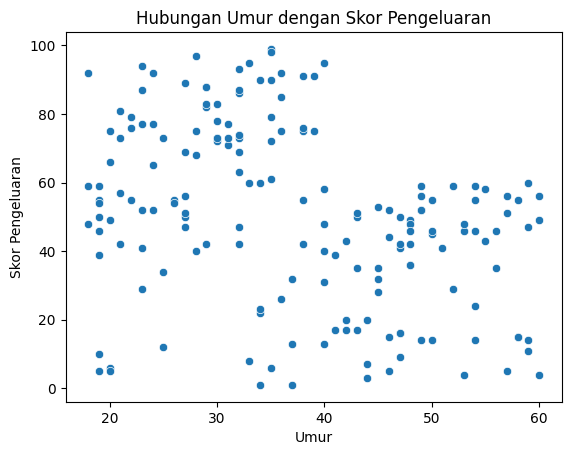

In [44]:
# Melihat hubungan antara umur dan skor pengeluaran
sns.scatterplot(x='Umur', y='Skor Pengeluaran', data=mit)
plt.title('Hubungan Umur dengan Skor Pengeluaran')
plt.xlabel('Umur')
plt.ylabel('Skor Pengeluaran')
plt.show()

Grafik scatter plot di atas menunjukkan hubungan antara variabel Umur dan Skor Pengeluaran. Berdasarkan sebaran data, tidak terdapat pola hubungan linier yang jelas antara kedua variabel tersebut.
*   Untuk orang dengan umur di bawah 30 tahun, terdapat lebih banyak variasi skor pengeluaran (tersebar dari skor rendah hingga tinggi, sekitar 0 hingga 100).
*   Umur di antara 30 dan 50 tahun juga memiliki variasi yang besar, tetapi terlihat lebih terpusat di kisaran skor pengeluaran menengah hingga tinggi (sekitar 40 hingga 100).
*   Untuk umur di atas 50 tahun, terlihat kecenderungan skor pengeluaran yang lebih rendah, dengan beberapa individu yang tetap memiliki pengeluaran tinggi.

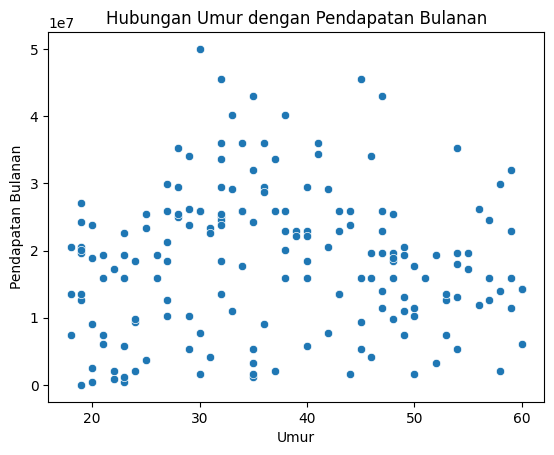

In [45]:
# Melihat hubungan antara umur dan Pendapatan Bulanan
sns.scatterplot(x='Umur', y='Pendapatan Bulanan', data=mit)
plt.title('Hubungan Umur dengan Pendapatan Bulanan')
plt.xlabel('Umur')
plt.ylabel('Pendapatan Bulanan')
plt.show()


Grafik scatter plot di atas menggambarkan hubungan antara variabel Umur dan Pendapatan Bulanan. Dari sebaran data yang terlihat, tidak terdapat pola hubungan linier yang signifikan antara kedua variabel tersebut.
*   Kelompok Usia Muda (20-30 tahun)
  *   Variasi pendapatan cukup besar, dari pendapatan rendah hingga menengah.
  *   Beberapa individu memiliki pendapatan yang tinggi, namun jumlahnya tidak banyak.

*   Kelompok Usia Menengah (30-40 tahun):
  *   Pendapatan lebih bervariasi, dengan distribusi pendapatan cenderung lebih tinggi dibandingkan kelompok usia muda.
  *   Sebagian besar individu berada dalam kisaran pendapatan menengah hingga tinggi.

*   Kelompok Usia Tua (50-60 tahun):
  *   Pendapatan cenderung lebih terkonsentrasi pada kisaran menengah.
  *   Variasi pendapatan lebih kecil dibandingkan kelompok usia muda dan menengah.

Sebagai langkah berikutnya, dilakukan visualisasi data numerik menggunakan boxplot dan distribusi untuk melihat pola dan variasi dari variabel Umur, Pendapatan Bulanan, dan Skor Pengeluaran.

In [46]:
kolom_num = ['Umur', 'Pendapatan Bulanan', 'Skor Pengeluaran']

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  ras

<Figure size 640x480 with 0 Axes>

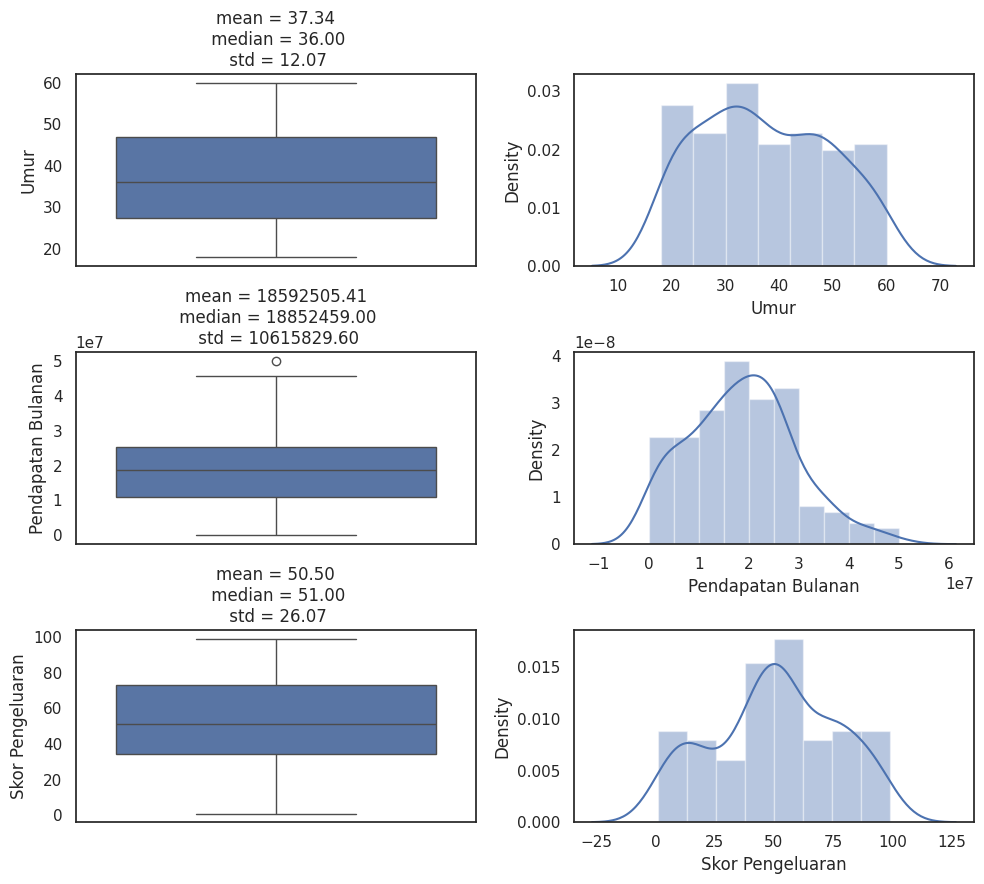

In [47]:
sns.set(style='white')
plt.clf()

# Fungsi untuk membuat plot
def observasi_num(features):
    fig, axs = plt.subplots(3, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    p1=sns.boxplot(mit[kol], ax = axs[i][0])
	    p2=sns.distplot(mit[kol], ax = axs[i][1])
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(mit[kol].mean(), mit[kol].median(), mit[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()

# Memanggil fungsi untuk membuat Plot untuk data numerik
observasi_num(kolom_num)

Dapat dilihat bahwa:
*   Umur:

  Rata-rata pelanggan MixItUp berusia sekitar 37 tahun, dengan mayoritas berusia 20 hingga 40 tahun. Loyalitas produk tampak merata di kelompok usia ini, menunjukkan daya tarik yang luas bagi konsumen dewasa.

*   Pendapatan Bulanan:

  Rata-rata pendapatan pelanggan sekitar 18 juta, dengan variasi besar. MixItUp berhasil menarik pelanggan dari berbagai tingkat pendapatan, termasuk konsumen berdaya beli tinggi yang lebih loyal dan sering membeli.

*   Skor Pengeluaran:

  Skor pengeluaran menunjukkan loyalitas pelanggan yang cukup baik, dengan rata-rata skor di kisaran 50-70. Ini mengindikasikan bahwa sebagian besar pelanggan setia, melakukan pembelian berulang, dan loyalitas tersebar di seluruh kelompok ekonomi.

## Eksplorasi Data Kategorik

In [48]:
kolom_kat = ['Jenis Kelamin','Menikah','Kota', 'Promo', 'HariFav', 'FavFlavor']

<Figure size 640x480 with 0 Axes>

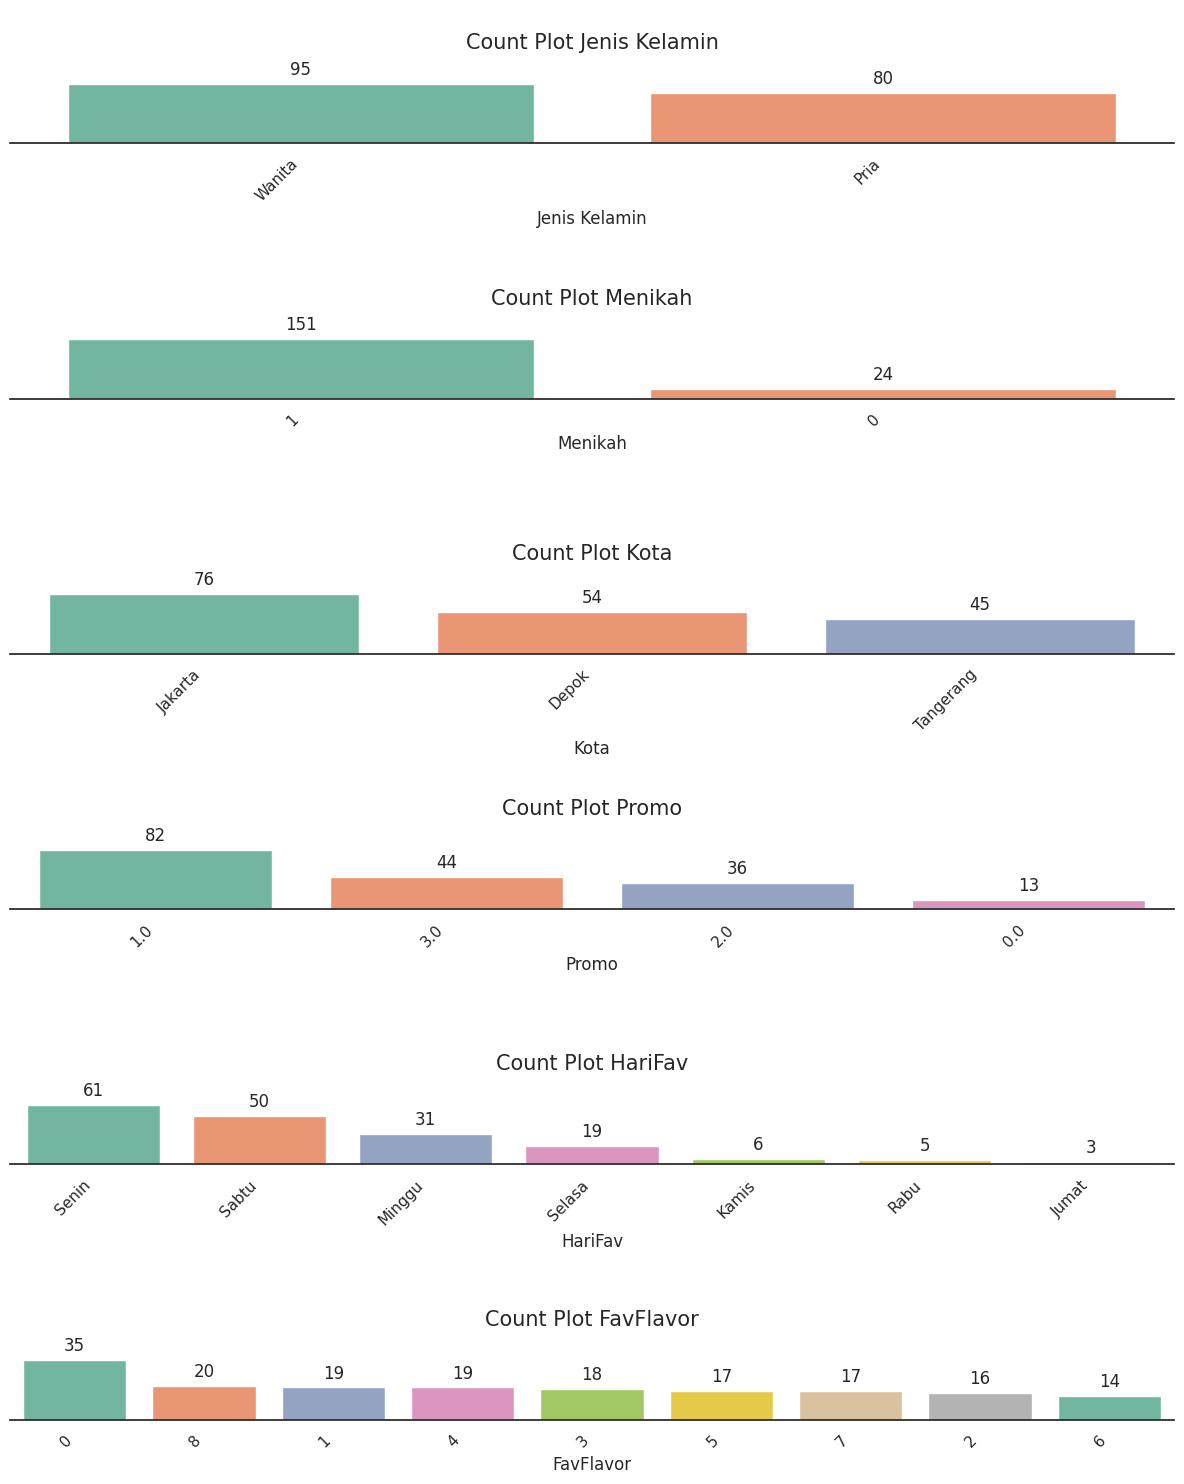

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya seaborn
sns.set(style='white')
plt.clf()

# Membuat canvas
fig, axs = plt.subplots(6, 1, figsize=(12, 15))

# Mengganti df dengan mit
for i, kol2 in enumerate(kolom_kat):
    # Membuat Plot dengan palet warna
    sns.countplot(x=kol2, data=mit, order=mit[kol2].value_counts().index, ax=axs[i], palette='Set2')
    axs[i].set_title('\nCount Plot %s\n' % (kol2), fontsize=15)

    # Memberikan anotasi
    for p in axs[i].patches:
        axs[i].annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center',
                        va='center',
                        xytext=(0, 10),
                        textcoords='offset points')

    # Mengatur label x-tick
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')

    # Mengatur tampilan plot
    sns.despine(right=True, top=True, left=True)
    axs[i].axes.yaxis.set_visible(False)

    # Menyesuaikan tata letak untuk plot individual
    plt.tight_layout()

# Tampilkan plot
plt.show()


Berdasarkan output didapat:

*   Jenis Kelamin: Mayoritas pelanggan adalah wanita,
menunjukkan daya tarik produk MixItUp yang lebih kuat di kalangan wanita.

*   Menikah: Sebagian besar pelanggan adalah orang yang sudah menikah, yang menunjukkan bahwa MixItUp mungkin lebih populer di kalangan keluarga atau pasangan.

*   Kota: Pelanggan MixItUp tersebar di beberapa kota dengan konsentrasi terbesar di Jakarta, diikuti oleh Depok dan Tangerang.

*   Promo: Sebagian besar pelanggan aktif memanfaatkan promo, menunjukkan bahwa promosi memainkan peran penting dalam mendorong pembelian.

*   Hari Favorit: Pelanggan cenderung lebih banyak berbelanja di awal minggu dan akhir pekan, dengan hari Senin dan Sabtu sebagai hari terfavorit.

*   Rasa Favorit (FavFlavor): Vanilla adalah rasa favorit, diikuti oleh Strawberry, tetapi varian rasa lainnya juga tetap diminati oleh pelanggan.

Dari output diatas didapat beberapa rekomendasi, yaitu :
1. Untuk meningkatkan jumlah pelanggan wanita, perusahaan dapat menciptakan ruang yang Instagramable di toko-toko mereka, yang akan menarik minat pelanggan wanita untuk berkunjung dan berbagi pengalaman mereka di media sosial. Sementara itu, untuk menarik lebih banyak pelanggan pria, MixItUp bisa mempertimbangkan untuk menambahkan varian es krim dengan rasa kopi yang mungkin lebih menarik bagi pria, serta menyediakan area merokok yang nyaman untuk mereka.
2. Karena sebagian besar pelanggan MixItUp sudah menikah, memperkenalkan paket keluarga atau bundling es krim untuk konsumsi bersama dapat menjadi strategi yang efektif. Penawaran ini bisa mencakup porsi es krim yang lebih besar dengan harga yang lebih hemat, yang akan mendorong pembelian dalam jumlah besar dan menarik bagi segmen keluarga.
3. Untuk meningkatkan pendaftaran program loyalitas, MixItUp dapat memberikan promo khusus atau keuntungan eksklusif bagi pelanggan yang memiliki kartu loyalitas, seperti diskon tambahan atau hadiah spesial. Strategi ini akan menarik lebih banyak pelanggan untuk mendaftar program tersebut, sekaligus mendorong penggunaan kartu loyalitas dalam transaksi mereka.
4. Mengatasi promo yang jarang digunakan oleh pelanggan dapat dilakukan dengan cara memperkuat promosi di berbagai media, termasuk media sosial dan melalui pemberitahuan langsung di toko. Pelayan bisa diberi tugas untuk secara aktif memberi tahu pelanggan tentang promo yang tersedia saat mereka datang ke toko. Selain itu, membuat iklan promosi yang lebih menarik dapat meningkatkan kesadaran pelanggan terhadap promo yang ada dan menggerakkan mereka untuk lebih memanfaatkannya.
5. Untuk meningkatkan penggunaan kartu loyalitas di hari-hari selain Senin, MixItUp bisa memperkenalkan promo khusus di hari-hari tertentu, terutama di hari yang lebih sepi seperti Rabu dan Jumat. Dengan cara ini, pelanggan akan terdorong untuk memanfaatkan kartu loyalitas mereka lebih sering di sepanjang minggu.
6. Vanilla merupakan rasa favorit pelanggan, tetapi untuk meningkatkan penjualan rasa lain, MixItUp bisa meluncurkan promo khusus untuk rasa tertentu yang kurang populer. Alternatif lainnya adalah membuat paket hemat yang mencampurkan es krim rasa Vanilla dengan rasa-rasa lainnya, sehingga pelanggan terdorong untuk mencoba varian baru sambil tetap menikmati rasa favorit mereka.


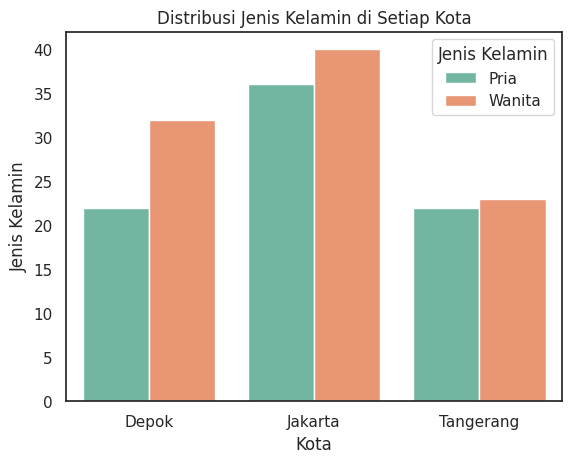

In [50]:
# Count plot dengan pewarnaan berdasarkan gender
sns.countplot(x='Kota', hue='Jenis Kelamin', data=mit, palette='Set2')
plt.title('Distribusi Jenis Kelamin di Setiap Kota')
plt.xlabel('Kota')
plt.ylabel('Jenis Kelamin')
plt.show()

Berdasarkan grafik distribusi jenis kelamin di setiap kota, Wanita mendominasi pelanggan MixItUp di Jakarta, meskipun distribusi di Depok dan Tangerang juga menunjukkan proporsi pelanggan pria yang cukup besar.

## Eksplorasi Data Numerik dan Kategorik

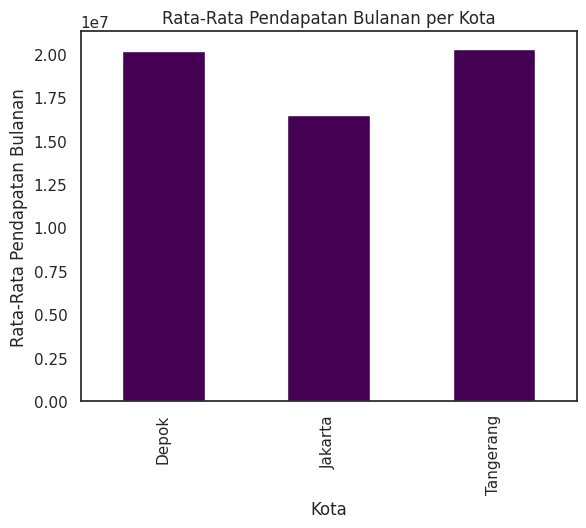

In [51]:
# Bar plot rata-rata Pendapatan Bulanan berdasarkan Kota
mit.groupby('Kota')['Pendapatan Bulanan'].mean().plot(kind='bar', colormap='viridis')
plt.title('Rata-Rata Pendapatan Bulanan per Kota')
plt.xlabel('Kota')
plt.ylabel('Rata-Rata Pendapatan Bulanan')
plt.show()

Grafik menunjukkan bahwa pelanggan di Depok dan Tangerang memiliki rata-rata pendapatan bulanan lebih tinggi (sekitar 20 juta) dibandingkan dengan Jakarta (sekitar 15 juta). Meskipun Jakarta memiliki basis pelanggan terbesar, daya beli rata-rata di Depok dan Tangerang lebih tinggi.

**Rekomendasi:**

Untuk Jakarta, MixItUp dapat memperkenalkan produk atau paket yang lebih terjangkau untuk menarik konsumen dengan daya beli yang lebih rendah. Di sisi lain, di Depok dan Tangerang, perusahaan bisa menawarkan produk premium atau eksklusif yang menargetkan pelanggan dengan pendapatan yang lebih tinggi.

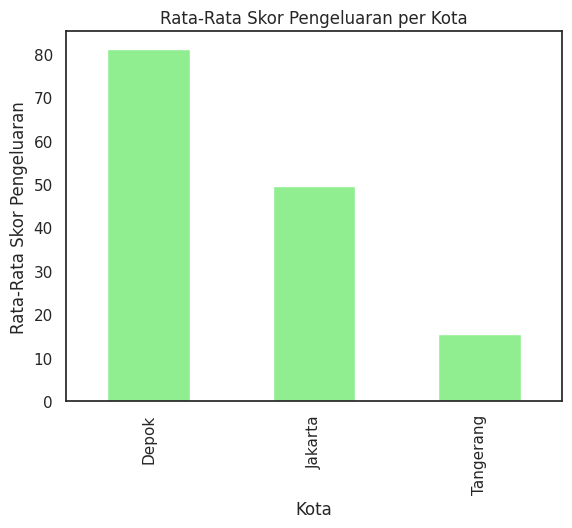

In [52]:
# Bar plot rata-rata Skor Pengeluaran berdasarkan Kota
mit.groupby('Kota')['Skor Pengeluaran'].mean().plot(kind='bar', color='lightgreen')
plt.title('Rata-Rata Skor Pengeluaran per Kota')
plt.xlabel('Kota')
plt.ylabel('Rata-Rata Skor Pengeluaran')
plt.show()


Skor Pengeluaran paling banyak di kota Depok yang berarti banyak customer yang menghabiskan uangnya untuk membeli MixlTup di depok.

# Standarisasi Kolom Numerik



In [53]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Statistik sebelum Standarisasi
print('Statistik sebelum Standarisasi\n')
print(mit[kolom_num].describe().round(1))

# Standarisasi
mit_std = StandardScaler().fit_transform(mit[kolom_num])

# Membuat DataFrame
mit_std = pd.DataFrame(data=mit_std, index=mit.index, columns=mit[kolom_num].columns)

# Menampilkan contoh isi data dan summary statistik
print('\nHasil Standarisasi\n')
print(mit_std.head())

print('\nStatistik Hasil Standarisasi\n')
print(mit_std.describe().round(0))


Statistik sebelum Standarisasi

        Umur  Pendapatan Bulanan  Skor Pengeluaran
count  175.0               175.0             175.0
mean    37.3          18592505.4              50.5
std     12.1          10615829.6              26.1
min     18.0                 0.0               1.0
25%     27.5          11065573.0              34.5
50%     36.0          18852459.0              51.0
75%     47.0          25409836.0              73.0
max     60.0          50000000.0              99.0

Hasil Standarisasi

       Umur  Pendapatan Bulanan  Skor Pengeluaran
0  0.969233           -0.517479          0.057602
1 -0.443539            1.418366          1.365738
2  1.135442           -0.246461         -0.365619
3 -1.523895           -0.556196          0.173026
4  0.055086            0.140708         -0.327144

Statistik Hasil Standarisasi

        Umur  Pendapatan Bulanan  Skor Pengeluaran
count  175.0               175.0             175.0
mean    -0.0                 0.0              -0.0
std 

Dapat dilihat setelah dilakukan standardisasi nilai mean dan standard deviasi setiap variabel menjadi 0 dan 1. Hal ini menunjukan bahwa data kita sudah dalam skala yang sama.

In [54]:
# Menggabungkan data frame
mit2 = mit_std.merge(mit, left_index = True, right_index=True, how = 'left')
print(mit2.head())

# Check the column names of mit2
print(mit2.columns)

# Menghapus salah satu kolom dengan nama yang sama
# Replace 'Umur_y' with the actual column name from mit2.columns output
mit2.drop(columns=['Umur_y'], inplace=True)  # Menghapus kolom Umur yang asli, bukan Umur_y
mit2.rename(columns={'Umur_x': 'Umur'}, inplace=True) # Rename Umur_x to Umur

#Similarly, for other columns, first check the actual column names using mit2.columns
# and then adjust the drop and rename statements accordingly.
mit2.drop(columns=['Pendapatan Bulanan_y'], inplace=True)
mit2.rename(columns={'Pendapatan Bulanan_x': 'Pendapatan Bulanan'}, inplace=True)
mit2.drop(columns=['Skor Pengeluaran_y'], inplace=True)
mit2.rename(columns={'Skor Pengeluaran_x': 'Skor Pengeluaran'}, inplace=True)

     Umur_x  Pendapatan Bulanan_x  Skor Pengeluaran_x Jenis Kelamin  Umur_y  \
0  0.969233             -0.517479            0.057602        Wanita      49   
1 -0.443539              1.418366            1.365738        Wanita      32   
2  1.135442             -0.246461           -0.365619          Pria      51   
3 -1.523895             -0.556196            0.173026          Pria      19   
4  0.055086              0.140708           -0.327144        Wanita      38   

   Pendapatan Bulanan_y  Skor Pengeluaran_y Menikah     Kota Promo HariFav  \
0              13114754                  52       1  Jakarta   1.0   Sabtu   
1              33606557                  86       1    Depok   1.0  Minggu   
2              15983606                  41       1  Jakarta   2.0  Minggu   
3              12704918                  55       0  Jakarta   1.0    Rabu   
4              20081967                  42       1  Jakarta   2.0   Senin   

  FavFlavor  
0         2  
1         6  
2         3  


In [55]:
print(mit2.head())

       Umur  Pendapatan Bulanan  Skor Pengeluaran Jenis Kelamin Menikah  \
0  0.969233           -0.517479          0.057602        Wanita       1   
1 -0.443539            1.418366          1.365738        Wanita       1   
2  1.135442           -0.246461         -0.365619          Pria       1   
3 -1.523895           -0.556196          0.173026          Pria       0   
4  0.055086            0.140708         -0.327144        Wanita       1   

      Kota Promo HariFav FavFlavor  
0  Jakarta   1.0   Sabtu         2  
1    Depok   1.0  Minggu         6  
2  Jakarta   2.0  Minggu         3  
3  Jakarta   1.0    Rabu         7  
4  Jakarta   2.0   Senin         8  


# Konversi Kategorik Data dengan Label


In [56]:
# Membuat salinan data frame
mit_encode = mit[kolom_kat].copy()

# Melakukan labelEncoder untuk semua kolom kategorik
for col in kolom_kat:
    mit_encode[col] = LabelEncoder().fit_transform(mit_encode[col])

# Menampilkan data
print(mit_encode.head(10))

   Jenis Kelamin  Menikah  Kota  Promo  HariFav  FavFlavor
0              1        1     1      1        4          2
1              1        1     0      1        2          6
2              0        1     1      2        2          3
3              0        0     1      1        3          7
4              1        1     1      2        6          8
5              1        1     0      0        6          0
6              0        1     1      1        6          5
7              1        1     0      1        6          3
8              1        1     1      2        5          6
9              1        1     1      2        6          4


# Persiapan Data Model

In [57]:
# Menggabungkan data frame
mit_model = mit_encode.merge(mit_std, left_index = True, right_index=True, how = 'left')
print(mit_model.head())

   Jenis Kelamin  Menikah  Kota  Promo  HariFav  FavFlavor      Umur  \
0              1        1     1      1        4          2  0.969233   
1              1        1     0      1        2          6 -0.443539   
2              0        1     1      2        2          3  1.135442   
3              0        0     1      1        3          7 -1.523895   
4              1        1     1      2        6          8  0.055086   

   Pendapatan Bulanan  Skor Pengeluaran  
0           -0.517479          0.057602  
1            1.418366          1.365738  
2           -0.246461         -0.365619  
3           -0.556196          0.173026  
4            0.140708         -0.327144  


In [58]:
mit.head()

,Jenis Kelamin,Umur,Pendapatan Bulanan,Skor Pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8


In [59]:
mit_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175 entries, 0 to 199
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Jenis Kelamin       175 non-null    int64  
 1   Menikah             175 non-null    int64  
 2   Kota                175 non-null    int64  
 3   Promo               175 non-null    int64  
 4   HariFav             175 non-null    int64  
 5   FavFlavor           175 non-null    int64  
 6   Umur                175 non-null    float64
 7   Pendapatan Bulanan  175 non-null    float64
 8   Skor Pengeluaran    175 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 13.7 KB


# Clustering

Mencari Jumlah Cluster yang Optimal

Salah satu parameter penting yang harus dimasukkan pada algoritma kprototype adalah jumlah cluster yang diinginkan. Oleh karena itu, kamu perlu mencari jumlah cluster yang optimal. Salah satu cara untuk mendapatkan nilai optimal tersebut adalah dengan menggunakan bantuan 'elbow plot'.

Elbow plot ini dapat dibuat dengan cara memvisualisasikan total jarak seluruh data kita ke pusat cluster-nya. Selanjutnya kita memilih titik siku dari pola yang terbentuk dan menjadikannya sebagai jumlah cluster kita.


**Cluster 0**: Customer berusia di bawah 37 tahun dengan pendapatan bulanan di antara Rp 18.000.000 kurang lebih. Rata-rata skor pengeluaran mereka di bawah 50.

**Cluster 1**: Sebagian besar customer berusia di atas 37 tahun dengan  mayoritas pendapatan bulanan di bawah Rp 18.000.000. Rata-rata skor pengeluaran mereka di bawah 50.

**Cluster 2**: Mayoritas customer berusia di bawah 37 tahun dengan pendapatan bulanan di atas Rp 18.000.000. Rata-rata skor pengeluaran mereka di atas 50.

**Cluster 3**: Sebagian besar customer berusia di atas 37 tahun dengan pendapatan bulanan di bawah Rp 18.000.000. Rata-rata skor pengeluaran mereka di abtara 50 kurang lebih.

**Cluster 4**: Mayoritas customer berusia di atas 37 tahun dengan pendapatan bulanan di atas Rp 18.000.000. Rata-rata skor pengeluaran mereka di bawah 50.

**Cluster 5**: Sebagian besar customer berusia di bawah 37 tahun dengan pendapatan bulanan di bawah Rp 18.000.000. Rata-rata skor pengeluaran mereka di atas 50.

## Prototypes

Membuat Model

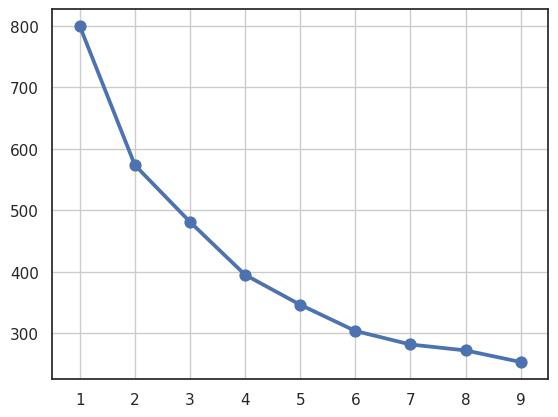

In [60]:
# Melakukan Iterasi untuk mendapatkan nilai Cost
cost = {}
for k in range(1,10):
  kproto = KPrototypes(n_clusters = k, random_state = 75)
  kproto.fit_predict(mit_model, categorical = [0,1,2,3,4,5])
  cost[k] = kproto.cost_

# Memvisualisasikan Elbow Plot
sns.pointplot(x = list(cost.keys()), y = list(cost.values()))
plt.grid()
plt.show()

Dari output diatas, garis mengalami patahan yang membentuk elbow atau siku pada saat k = 4 5 6. Maka dengan menggunakan metode ini diperoleh k optimal pada saat berada di k = 4. Untuk menjadi pembanding, dilakukan uji yang lainnya.Berdasarkan output di atas didapat nilai k yang optimal

In [61]:
kproto = KPrototypes(n_clusters = 4, random_state = 75)
kproto = kproto.fit(mit_model, categorical = [0,1,2,3,4,5])

#Save Model
pickle.dump(kproto, open('cluster.pkl', 'wb'))

In [62]:
mit_model.head()

,Jenis Kelamin,Menikah,Kota,Promo,HariFav,FavFlavor,Umur,Pendapatan Bulanan,Skor Pengeluaran
0,1,1,1,1,4,2,0.969233,-0.517479,0.057602
1,1,1,0,1,2,6,-0.443539,1.418366,1.365738
2,0,1,1,2,2,3,1.135442,-0.246461,-0.365619
3,0,0,1,1,3,7,-1.523895,-0.556196,0.173026
4,1,1,1,2,6,8,0.055086,0.140708,-0.327144


Menggunakan Model

In [63]:
# Menentukan segmen tiap pelanggan
clusters = kproto.predict(mit_model, categorical = [0,1,2,3,4,5])
print('Segmen Pelanggan: {}\n'.format(clusters))

# Menggabungkan data awal dan segmen pelanggan
mit_final =mit2.copy()
mit_final['cluster'] = clusters
print(mit_final.head(15))

Segmen Pelanggan: [2 3 2 0 2 3 0 0 0 0 3 1 2 2 1 3 2 0 0 2 1 3 0 2 2 0 3 0 3 3 0 1 0 3 2 0 2
 0 1 3 2 0 2 0 2 0 2 1 2 2 2 2 1 2 0 2 2 2 2 3 2 0 3 2 2 2 1 0 1 2 3 3 0 3
 2 1 2 2 2 0 2 3 1 2 1 1 2 2 0 2 1 2 2 0 0 0 0 0 3 0 2 2 1 2 3 2 2 1 1 1 0
 2 1 2 1 0 1 1 3 0 0 3 0 1 1 3 0 2 0 2 1 1 0 3 0 2 3 3 2 3 0 3 2 3 2 3 3 0
 3 0 1 2 0 3 1 1 0 0 3 3 1 0 1 2 0 2 2 0 3 2 0 2 3 0 2]

        Umur  Pendapatan Bulanan  Skor Pengeluaran Jenis Kelamin Menikah  \
0   0.969233           -0.517479          0.057602        Wanita       1   
1  -0.443539            1.418366          1.365738        Wanita       1   
2   1.135442           -0.246461         -0.365619          Pria       1   
3  -1.523895           -0.556196          0.173026          Pria       0   
4   0.055086            0.140708         -0.327144        Wanita       1   
5  -0.360435            0.992480          1.712009        Wanita       1   
6  -0.859061            0.256859          0.211500          Pria       1   
7  -1.108374     

Menampilkan Cluster Tiap Pelanggan

Setelah digabungkan data awal pelanggan dan cluster-nya, perlu untuk menampilkan dan mengobservasi hasilnya untuk membantu dalam memberi nama tiap cluster berdasarkan karakteristiknya.

In [64]:
# Menampilkan data pelanggan berdasarkan clusternya
for i in range (0,5):
    print('\nPelanggan Cluster: {}\n'.format(i))
    print(mit_final[mit_final['cluster'] == i])


Pelanggan Cluster: 0

         Umur  Pendapatan Bulanan  Skor Pengeluaran Jenis Kelamin Menikah  \
3   -1.523895           -0.556196          0.173026          Pria       0   
6   -0.859061            0.256859          0.211500          Pria       1   
7   -1.108374           -1.562836          1.019467        Wanita       1   
8   -0.443539           -0.478762         -0.134771        Wanita       1   
9   -1.357686            0.063275         -0.327144        Wanita       1   
20  -1.274582           -1.562836          1.096416          Pria       0   
21  -1.606999           -0.478762          0.326924          Pria       0   
25  -1.357686           -0.246461          0.249975        Wanita       0   
28  -1.440791           -0.904648          0.942518        Wanita       0   
30  -1.108374           -0.865931          1.596586          Pria       1   
34  -1.191478            0.063275         -0.365619        Wanita       1   
36  -0.859061           -0.014159         -0.019347  

Visualisasi Hasil Clustering - Box Plot

Membuat visualisasi hasil clustering untuk dapat memudahkan kamu melakukan penamaan di tiap-tiap cluster.

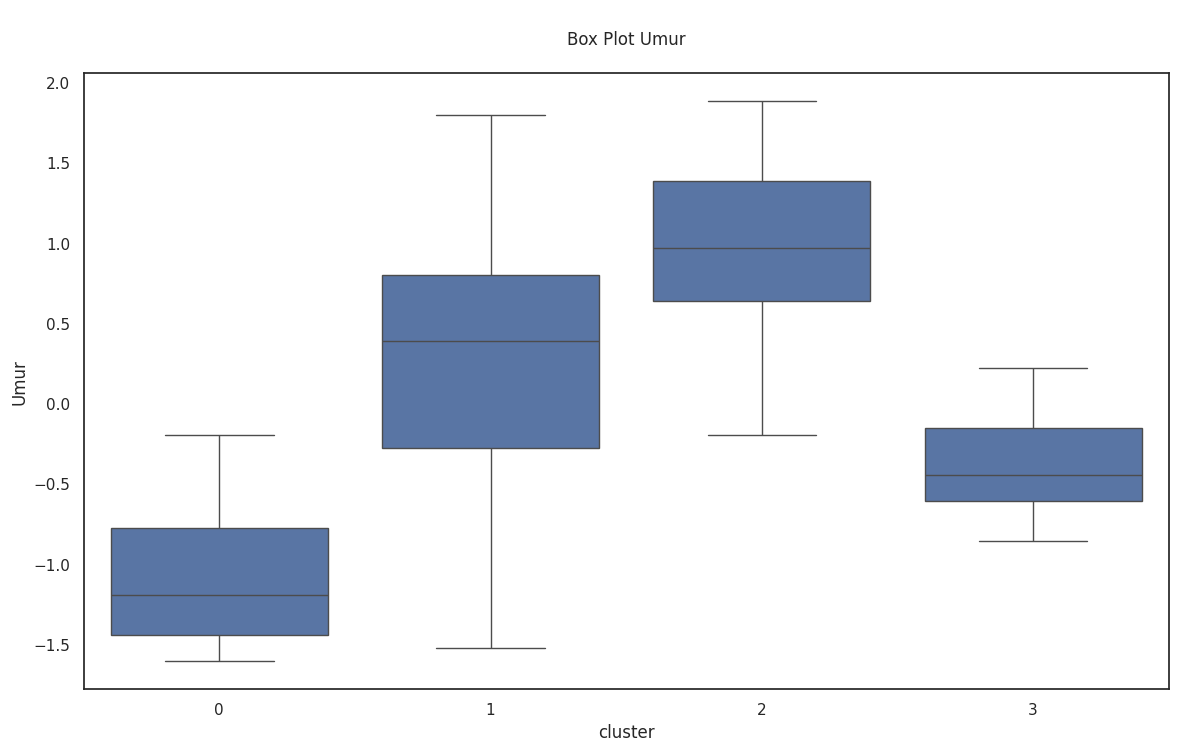

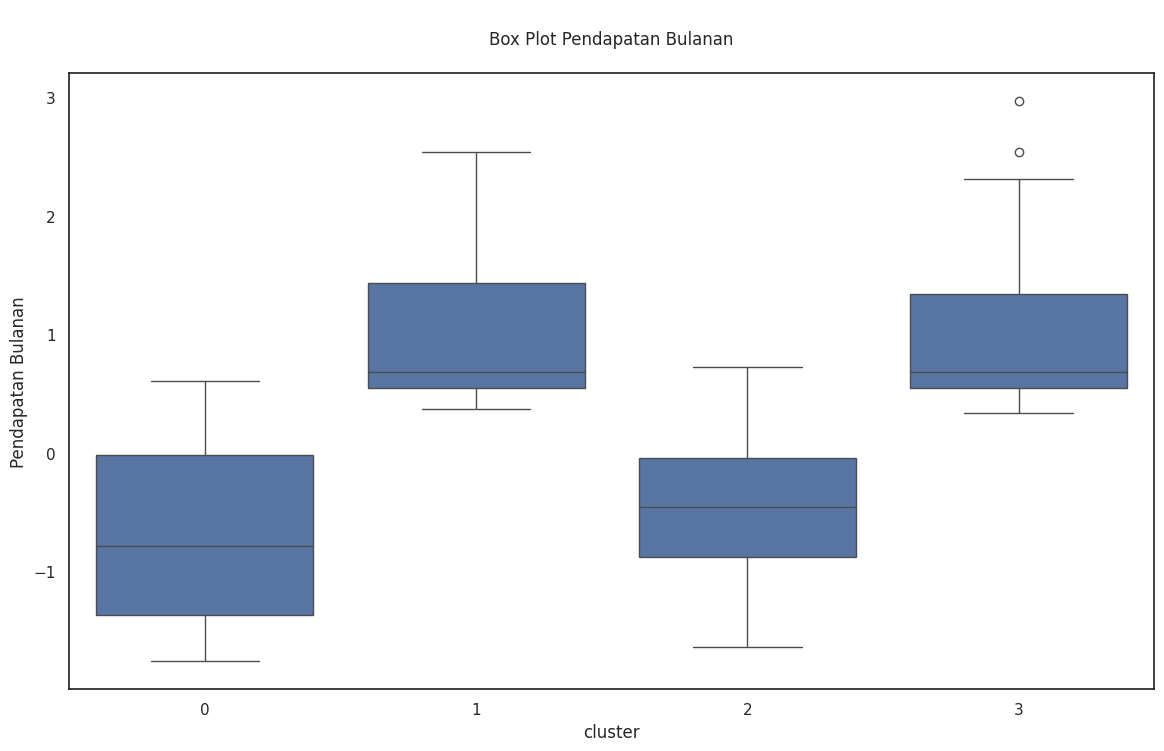

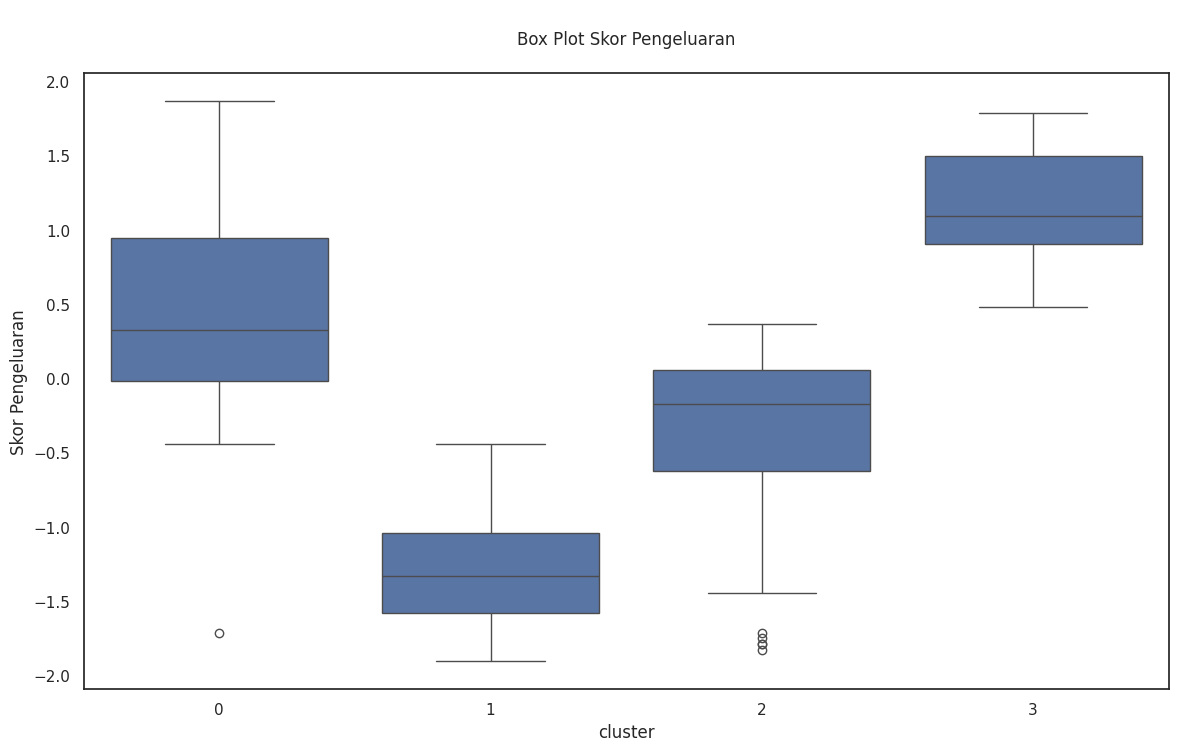

In [65]:
for i in kolom_num:
    plt.figure(figsize=(14,8))
    ax = sns.boxplot(x = 'cluster',y = i, data = mit_final)
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()

Dari Visualisasi diatas terdapat:
1. **Cluster 0** Umur di bawah 37 tahun dengan pendapatan bulanan di bawah Rp18.000.000 dan skor pengeluaran di atas 50.
2. **Cluster 1** Umur mayoritas lebih dari 37 tahun dengan pendapatan bulanan di atas Rp18.000.000 dan skor pengeluaran di bawah 50.
3. **Cluster 2** Umur lebih dari 37 tahun dengan pendapatan di bawah Rp18.000.000 dan skor pengeluaran di bawah 50.
4. **Cluster 3** Umur kurang dari 37 tahun dengan pendapatan bulanan di atas Rp18.000.000 dan skor pengeluaran di atas 50.

Visualisasi Hasil Clustering - Count Plot

Membuat visualisasi hasil clustering untuk dapat memudahkan melakukan penamaan di tiap-tiap cluster.

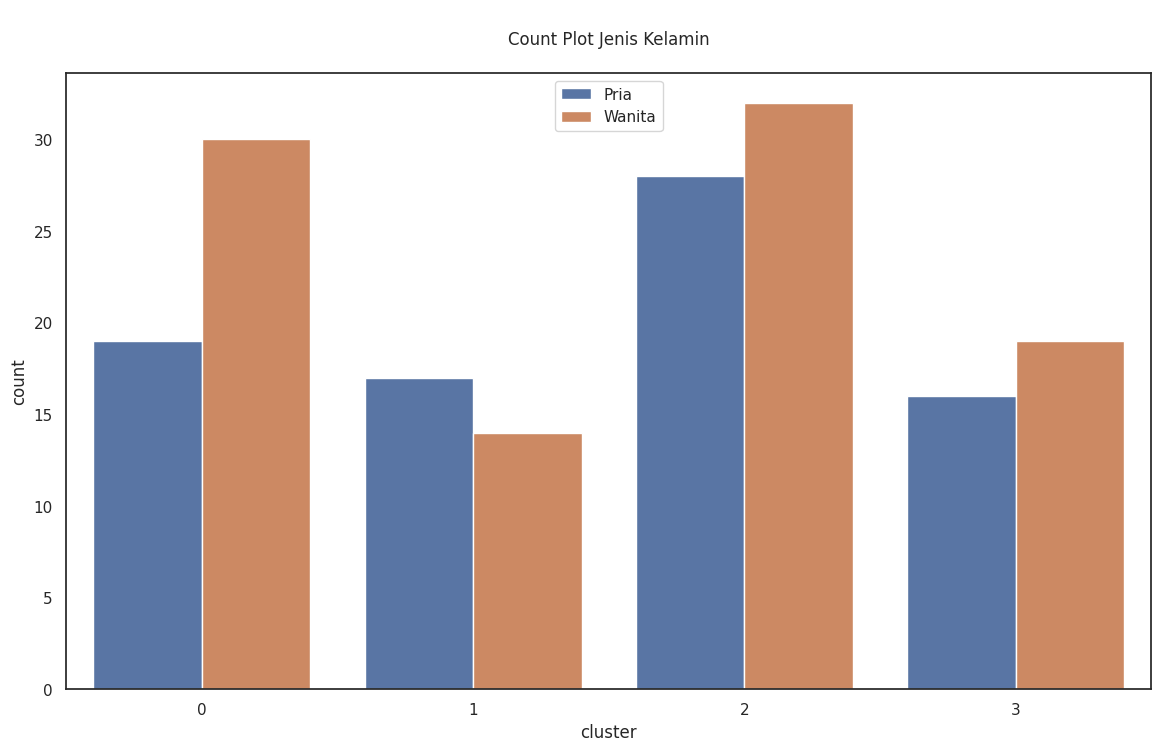

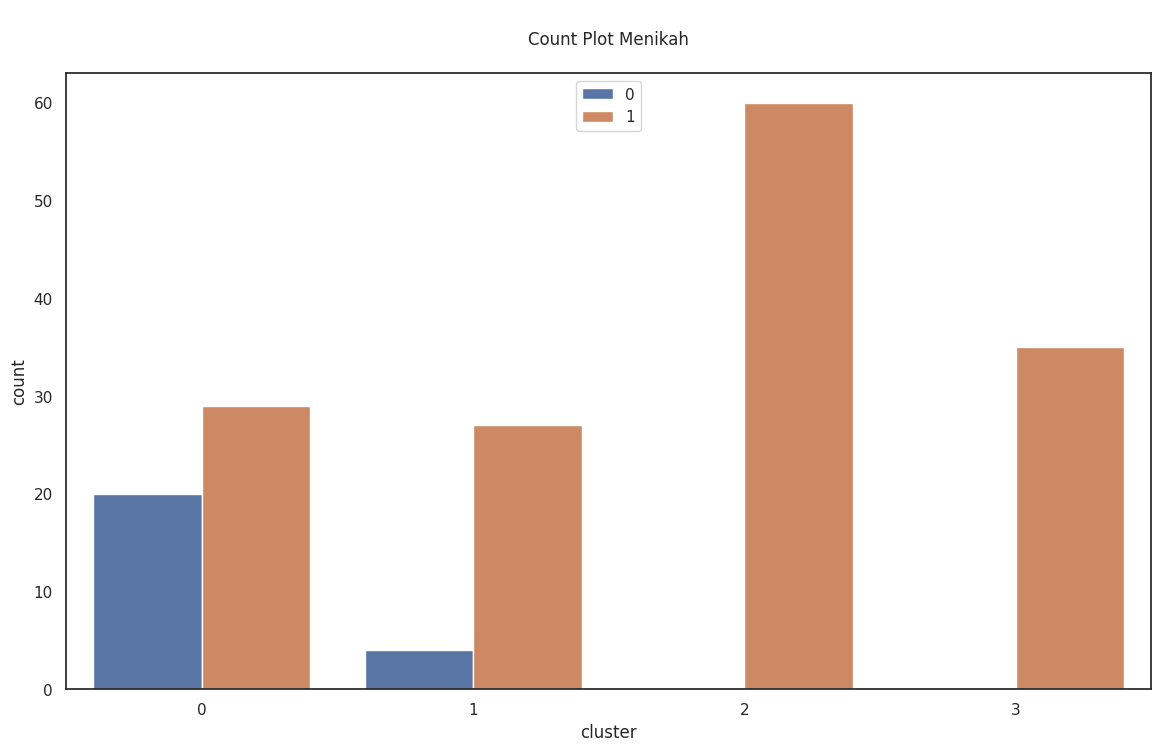

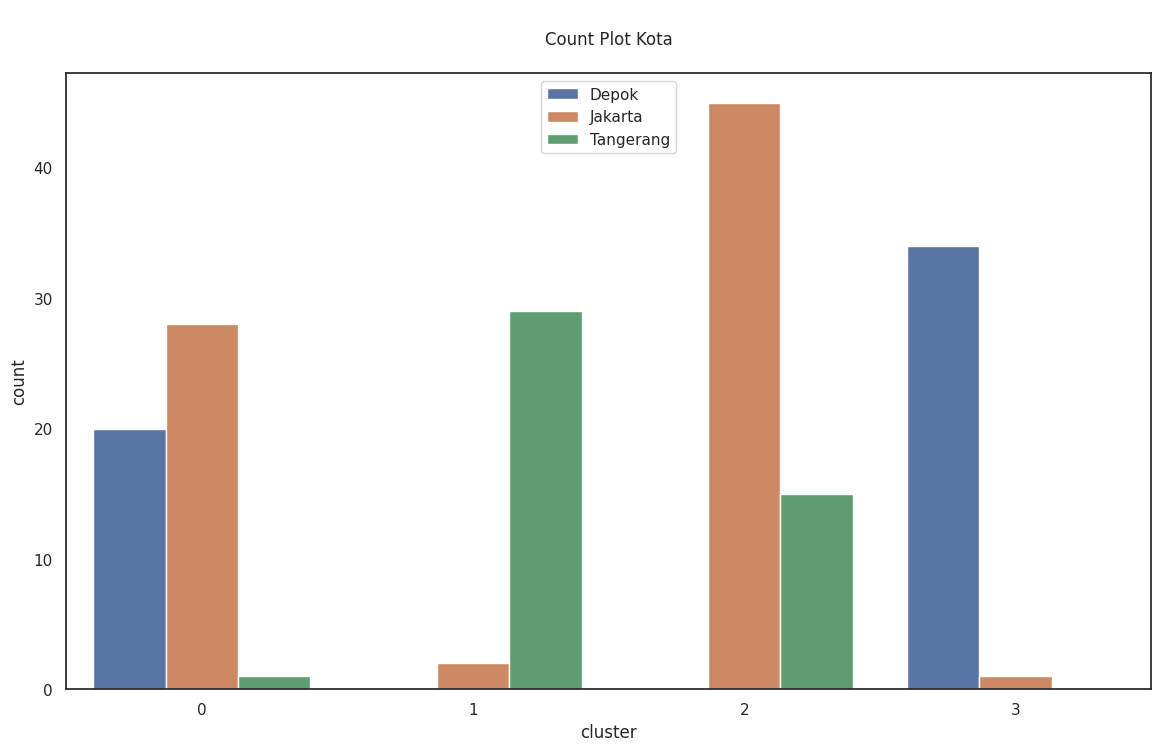

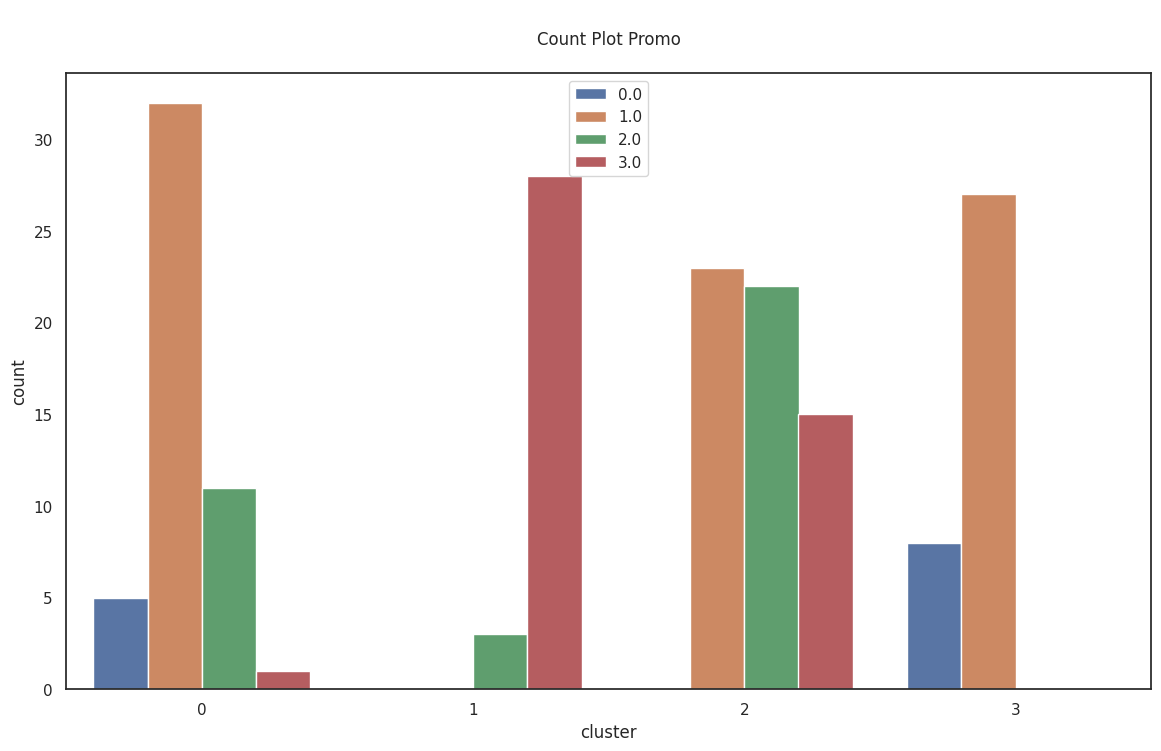

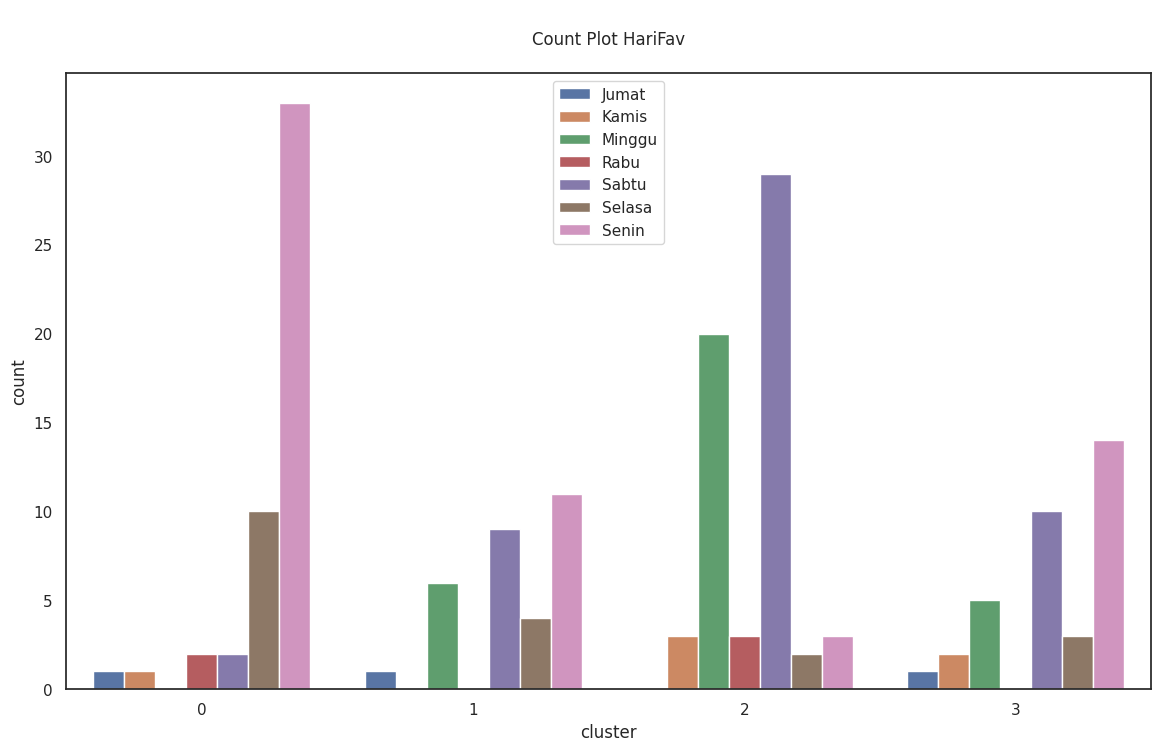

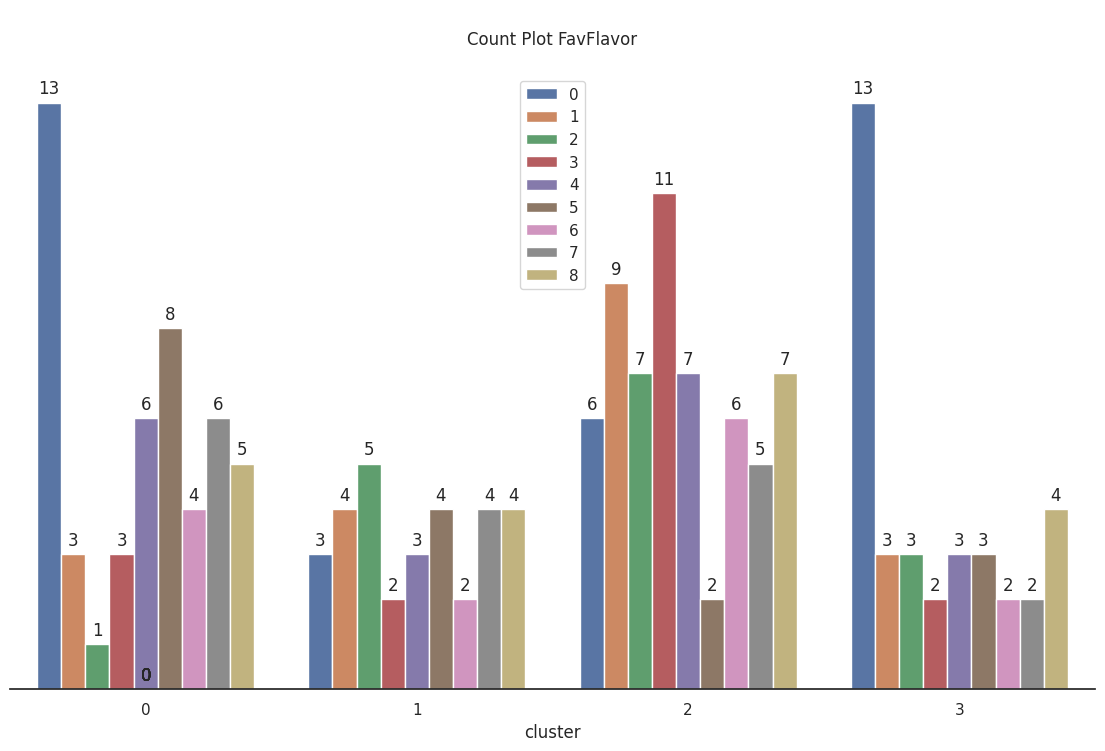

In [66]:
for i in kolom_kat:
    plt.figure(figsize=(14,8))
    ax = sns.countplot(data = mit_final, x = 'cluster', hue = i )
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)
    ax.legend(loc="upper center")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center',
    va = 'center',
    xytext = (0, 10),
    textcoords = 'offset points')

sns.despine(right = True,top = True, left = True)
ax.axes.yaxis.set_visible(False)
plt.show()

**Cluster 0**: Wanita lebih banyak, sebagian besar sudah menikah. Sebagian besar dari Jakarta. Promo jarang digunakan, dan hari teramai adalah Senin. Rasa favorit: Vanilla.

**Cluster 1**: Pria lebih banyak,sebagian besar sudah menikah . Sebagian besar dari Tangerang. Promo sering digunakan, dan hari teramai adalah Senin. Rasa favorit: Coconut.

**Cluster 2**: Wanita lebih banyak, semua sudah menikah. Sebagian besar dari Jakarta. Promo jarang digunakan, hari teramai adalah Sabtu. Rasa favorit: Blueberry.

**Cluster 3**: wanita lebih banyak,semua sudah menikah . Sebagian besar dari Depok. Promo jarang digunakan, hari teramai adalah Senin. Rasa favorit: Vanilla.

Menamakan Cluster

In [67]:
# Mapping nama kolom
mit_final['Segmen'] = mit_final['cluster'].map({
0: 'Diamond Customer',
1: 'Silver Customer',
2: 'Bronze Customer',
3: 'Gold Customer',
})

print(mit_final.info())
print(mit_final.head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 175 entries, 0 to 199
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Umur                175 non-null    float64 
 1   Pendapatan Bulanan  175 non-null    float64 
 2   Skor Pengeluaran    175 non-null    float64 
 3   Jenis Kelamin       175 non-null    category
 4   Menikah             175 non-null    category
 5   Kota                175 non-null    category
 6   Promo               175 non-null    category
 7   HariFav             175 non-null    category
 8   FavFlavor           175 non-null    category
 9   cluster             175 non-null    uint16  
 10  Segmen              175 non-null    object  
dtypes: category(6), float64(3), object(1), uint16(1)
memory usage: 9.5+ KB
None
       Umur  Pendapatan Bulanan  Skor Pengeluaran Jenis Kelamin Menikah  \
0  0.969233           -0.517479          0.057602        Wanita       1   
1 -0.443539        


# Kesimpulan Akhir

* Diamond Customer:

  Diamond Customer memiliki daya beli yang cukup tinggi, namun tidak terlalu responsif terhadap promosi diskon. Oleh karena itu, strategi yang lebih cocok untuk Diamond Customer ini adalah program loyalitas atau penawaran produk eksklusif.

* Silver Customer:

 Silver Customer menunjukkan respons yang kuat terhadap promosi, sehingga strategi pemasaran yang berfokus pada diskon dan voucher akan sangat efektif dalam menarik dan mempertahankan Silver Customer ini.


* Bronze Customer:
 Bronze Customer memiliki daya beli yang lebih rendah, sehingga pendekatan yang lebih cocok adalah memberikan penawaran paket hemat atau produk dengan harga yang lebih terjangkau untuk meningkatkan penjualan kepada Bronze Customer.


* Gold Customer:
  Gold Customer ini memiliki daya beli yang tinggi, strategi yang lebih efektif akan melibatkan produk premium atau layanan eksklusif yang menambah nilai pembelian, daripada promosi diskon.


# Rekomendasi Strategis untuk MixITup

1. Fokus Promosi Berbasis Diskon untuk Silver Customer:

  Kami merekomendasikan untuk meningkatkan frekuensi diskon, terutama pada hari Senin, yang merupakan hari teramai bagi kelompok ini. Strategi ini dapat menarik minat Silver Customer untuk lebih sering melakukan pembelian dengan mendorong loyalitas terhadap brand melalui promosi yang menarik.

2. Program Loyalitas dan Produk Eksklusif untuk Diamond Customer dan Gold Customer

 Kami merekomendasikan program loyalitas berbasis poin atau membership yang menawarkan keuntungan eksklusif, seperti akses lebih awal ke produk baru, produk premium, atau layanan khusus. Ini dapat meningkatkan engagement tanpa mengandalkan potongan harga, yang terbukti kurang efektif untuk Customer Diamond dan Gold ini. Selain itu, penawaran eksklusif, seperti menu spesial hanya untuk member, dapat meningkatkan frekuensi kunjungan dan nilai pembelian.

3. Penawaran Paket Hemat untuk Bronze Customer:

 Kami merekomendasikan penawaran paket hemat yang mencakup kombinasi beberapa produk dengan harga lebih terjangkau. Selain itu, memperkenalkan diskon spesifik pada hari teramai mereka, yaitu Sabtu, dapat meningkatkan volume penjualan. Strategi ini akan memberikan insentif bagi mereka untuk berbelanja lebih banyak dengan tetap mempertimbangkan daya beli Bronze Customer yang lebih terbatas.

4. Optimalisasi Produk Berdasarkan Preferensi Rasa:

 Kami merekomendasikan untuk meningkatkan ketersediaan rasa Vanilla di Jakarta dan Depok untuk Diamond dan Gold Customer, lalu rasa Coconut di Tangerang untuk Silver Customer, dan rasa Blueberry di Jakarta untuk Bronze Customer.

5. Menyesuaian Kapasitas dan Promosi Berdasarkan Hari Teramai:

 Kami merekomendasikan agar MixITup mengoptimalkan kapasitas operasional, seperti menambah staf dan persediaan di cabang-cabang pada :
 - Hari senin dan sabtu di kota Jakarta
 - Hari senin di kota Tangerang
 - Hari Senin di kota Depok

 agar dapat melayani lonjakan permintaan dengan lebih baik.

 Menawarkan promo "Monday Madness" untuk Diamond Customer, Gold Customer, dan Silver Customer. Serta "Saturday Special" untuk Bronze Customer.

6. Segmentasi Pemasaran Berdasarkan Lokasi:

 Kami menyarankan untuk menargetkan kampanye iklan dan promosi secara geografis.

 Memasang iklan digital yang menargetkan Tangerang dapat difokuskan pada penawaran promosi Coconut untuk Silver Customer, sementara Jakarta dapat menjadi target utama untuk promosi Blueberry bagi Bronze Customer.


# Kesimpulan Keseluruhan
Dengan memahami karakteristik dan kebiasaan customer, MixITup dapat mengembangkan strategi pemasaran yang lebih efektif dan efisien. Dengan menargetkan promosi, rasa favorit, serta jadwal layanan yang disesuaikan dengan preferensi tiap customer, kita bisa meningkatkan kepuasan pelanggan sekaligus memaksimalkan penjualan di berbagai segmen.

